## Country Development Clustering with K-Means Clustering

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv('Country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [38]:
df.shape

(167, 10)

In [39]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [40]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [41]:
df['country'].unique().size

167

In [42]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#### Plotting the Histogram and Boxplot for each column

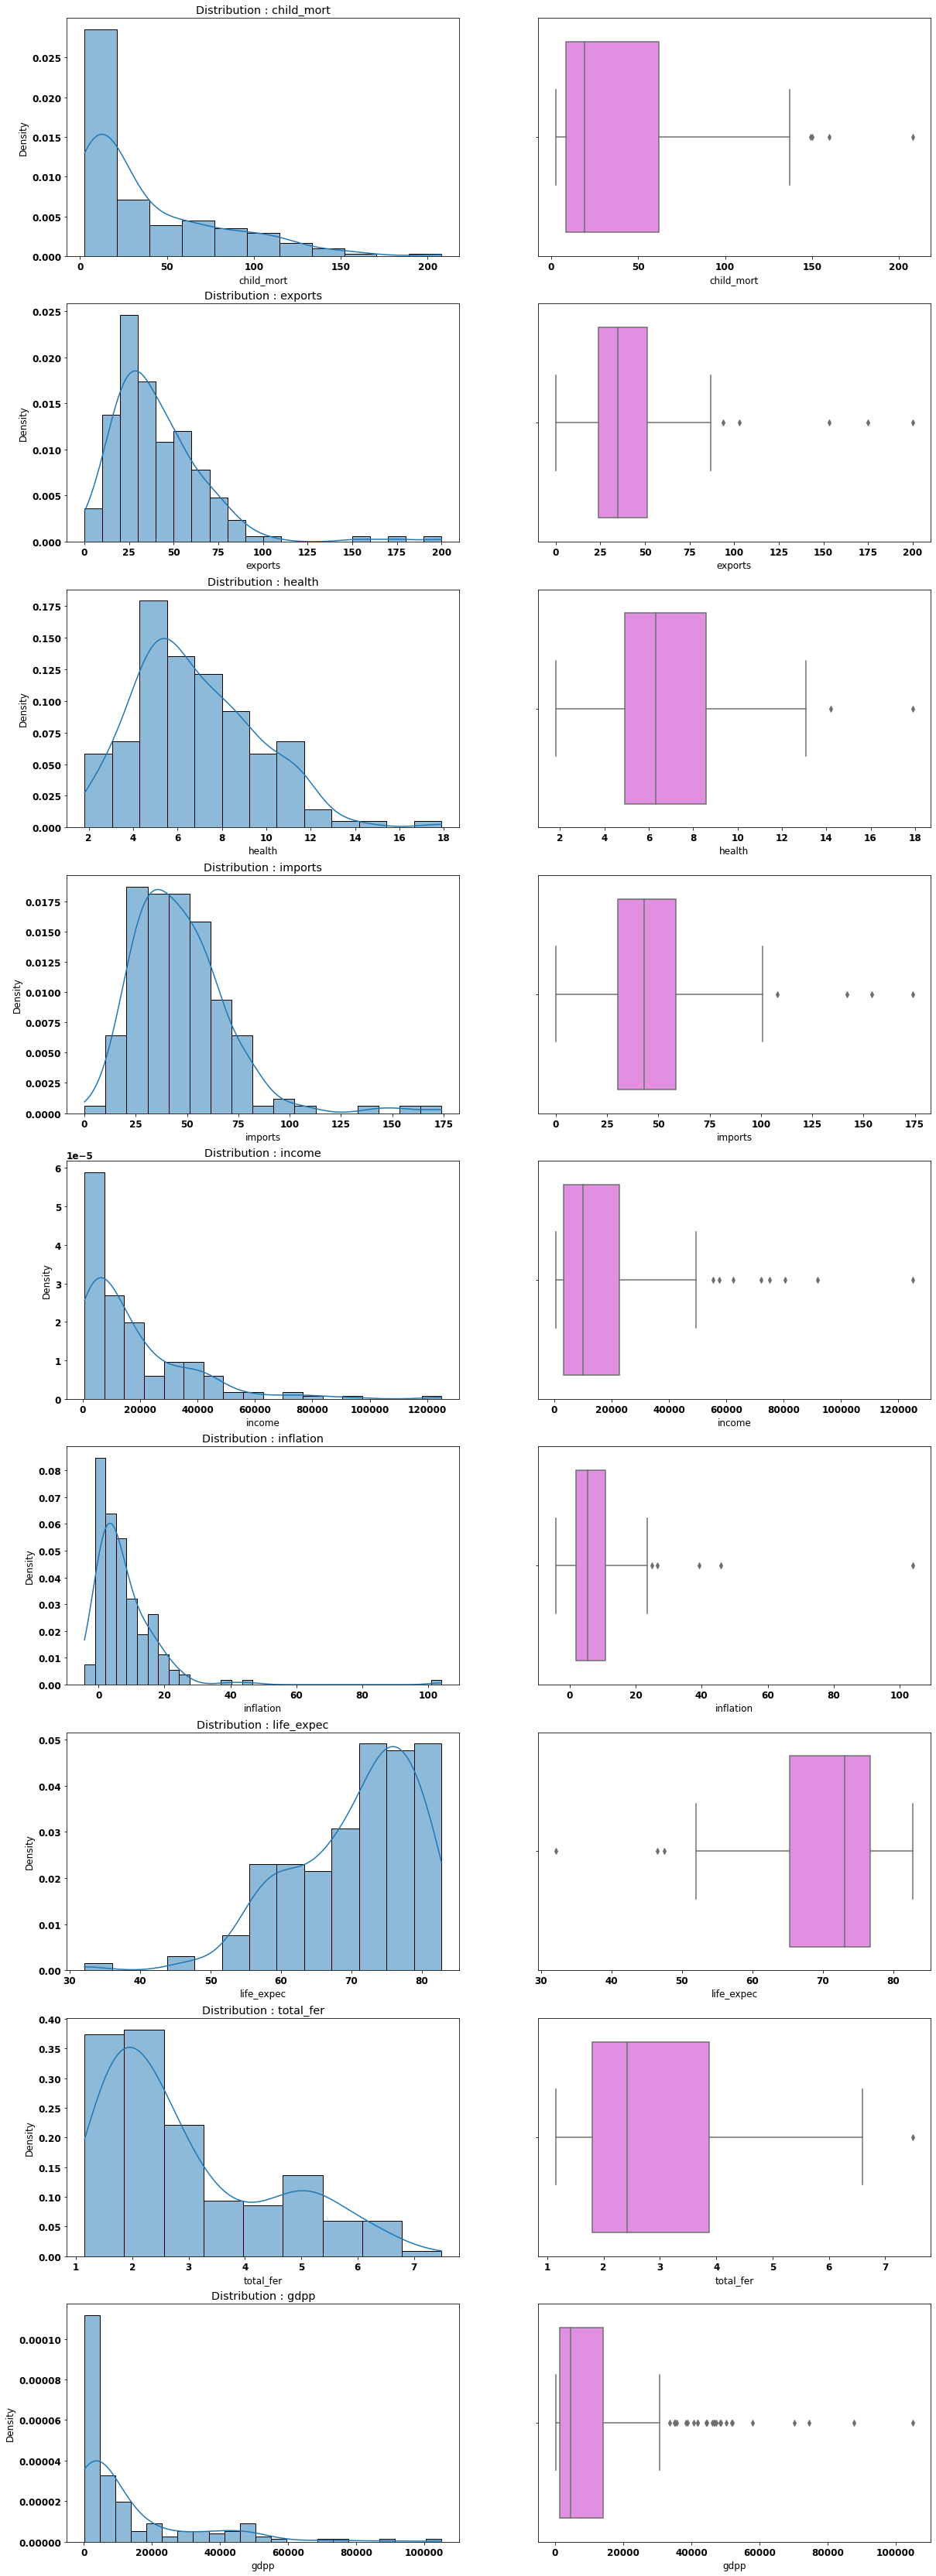

In [43]:
fig, ax = plt.subplots(nrows = df.shape[1]-1,ncols = 2,figsize = (20,60))
font = {
        'weight' : 'bold',
        'size'   : 12}

plt.rc('font', **font)
for i in range(1,df.shape[1]):
    plt.subplot(df.shape[1]-1,2,2*i-1)
    sns.histplot(x=df.iloc[:,i],stat='density',kde=True)
    title = 'Distribution : ' + df.columns[i]
    plt.title(title)
    plt.subplot(df.shape[1]-1,2,2*i)
    sns.boxplot(x=df.iloc[:,i],color='violet')
plt.show()

#### Making Heatmap for correlation matrix

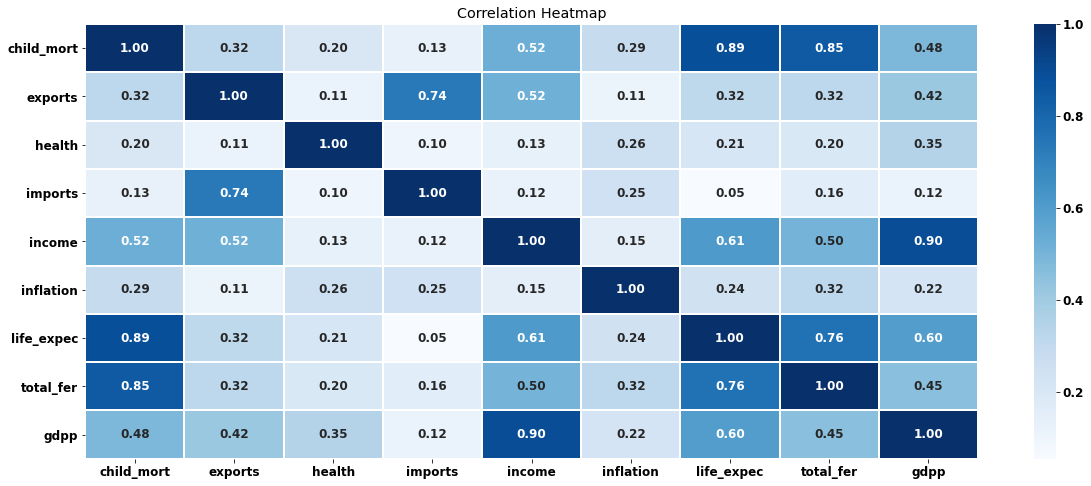

In [44]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr().abs(), annot=True, fmt='.2f', linewidths=1, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

We can see that some columns are highly related, we can plot them and do futher analysis.

/home/prajjwalbajpai/.conda/envs/machine_learning/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Life Expectancy vs Child Mortality')

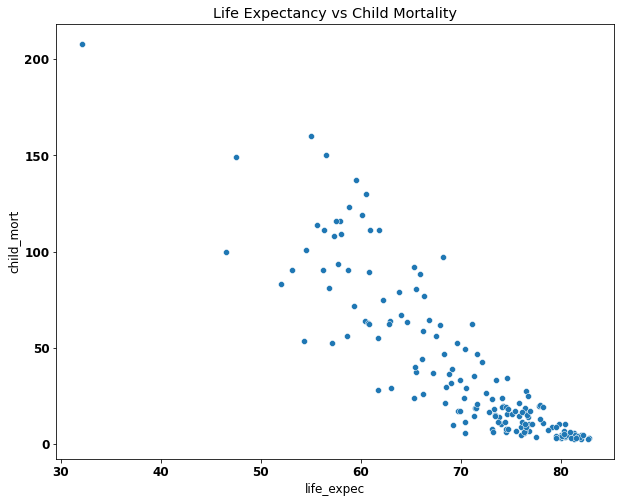

In [45]:
plt.figure(figsize=(10,8))
sns.scatterplot(df.life_expec,df.child_mort)
plt.title('Life Expectancy vs Child Mortality')

We see that child mortality rate is inversely related to life expectancy as child mortality decreases life expectancy.

/home/prajjwalbajpai/.conda/envs/machine_learning/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'GDP vs Income')

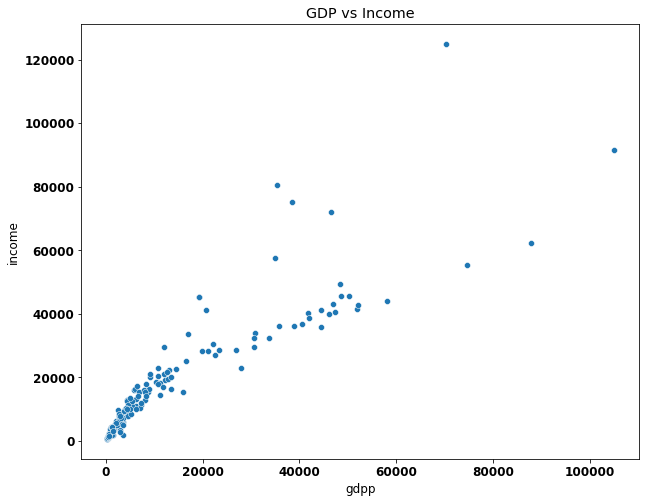

In [46]:
plt.figure(figsize=(10,8))
sns.scatterplot(df.gdpp,df.income)
plt.title('GDP vs Income')

GDP is directly proportional to Income which means the income recorded for each country is average and is not biased.

/home/prajjwalbajpai/.conda/envs/machine_learning/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Total Fertility vs Child Mortality')

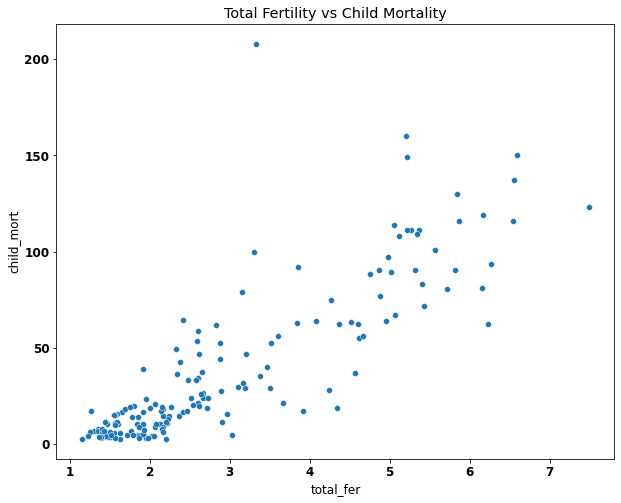

In [47]:
plt.figure(figsize=(10,8))
sns.scatterplot(df.total_fer,df.child_mort)
plt.title('Total Fertility vs Child Mortality')

Child mortality increases with total fertilty with a little bit of deviation both positive and negetive which indicates having a high number of children is prevalent in under-developed and developing nations where they have more child mortality rate.

#### Condensing the data into two factors Health and Economy

In [48]:
df1 = pd.DataFrame()
df1['Health'] = (df['child_mort'] / df['child_mort'].mean()) + (df['health'] / df['health'].mean()) + (df['life_expec'] / df['life_expec'].mean()) + (df['total_fer'] / df['total_fer'].mean())
df1['Economy'] = -(df['imports'] / df['imports'].mean()) + (df['exports'] / df['exports'].mean()) + (df['income'] / df['income'].mean()) - (df['inflation'] / df['inflation'].mean()) + (df['gdpp'] / df['gdpp'].mean())
df1.head()

,Health,Economy
0,6.239852,-1.790819
1,3.035901,-0.037659
2,3.389763,-0.708023
3,6.469020,-1.661499
4,2.964898,1.720746


In [49]:
X = df.drop(columns=['country']).copy()
X

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


#### Doing Standard scaling for the data to Center it.

In [50]:
from sklearn.preprocessing import StandardScaler

scal = StandardScaler()
X_s = scal.fit_transform(df1)
X_s_df = pd.DataFrame(X_s, columns=df1.columns)
X_s_df

,Health,Economy
0,1.627045,-0.861253
1,-0.700329,-0.320224
2,-0.443281,-0.527100
3,1.793515,-0.821345
4,-0.751906,0.222424
...,...,...
162,-0.280791,-0.285720
163,-0.672837,-1.412377
164,-0.501270,-0.663774
165,0.560765,-1.133870


#### Doing PCA which a dimension reduction method for unsupervised learning and using MinMaxscaler for it.

In [51]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

mmscal = MinMaxScaler()
df2 = df.drop(columns=['country'])
df_s = mmscal.fit_transform(df2)
df_s = pd.DataFrame(df_s, columns=df2.columns)

pca = PCA()
pca_df = pd.DataFrame(pca.fit_transform(df_s), columns=[f"pc{i}" for i in range(1,10)])
pca.explained_variance_

array([0.14180615, 0.03450913, 0.03171502, 0.02513534, 0.00974048,
       0.00776992, 0.00306922, 0.00228894, 0.00178941])

Plotting variance values for each feature in the dataset.


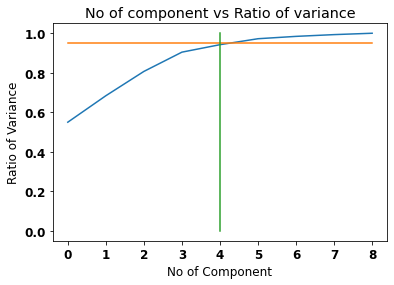

In [52]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No of Component')
plt.ylabel('Ratio of Variance')
plt.title('No of component vs Ratio of variance')
plt.plot([0,8],[0.95,0.95])
plt.plot([4,4],[0,1])
plt.show()

And we use 0.95 as the limit for ratio of variance thus, we can drop rest components.

In [53]:
pca_df = pca_df.drop(columns = ["pc6","pc7","pc8","pc9"])

pca_df

,pc1,pc2,pc3,pc4,pc5
0,-0.599078,0.095490,0.157554,-0.024333,-0.045618
1,0.158474,-0.212092,-0.064189,-0.061247,0.014191
2,0.003686,-0.135867,-0.134182,0.133574,-0.091150
3,-0.650235,0.275975,-0.142672,0.156018,-0.081997
4,0.200711,-0.064662,-0.100715,-0.037902,-0.035799
...,...,...,...,...,...
162,-0.160078,-0.029625,-0.121910,-0.066099,-0.009043
163,0.061133,-0.171339,-0.058586,0.247460,-0.093260
164,0.115512,-0.032034,-0.195243,-0.231993,-0.035734
165,-0.332968,-0.019824,-0.029989,0.105416,-0.141550


In [54]:
y=df.country
y

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 167, dtype: object

In [55]:
pca_df

,pc1,pc2,pc3,pc4,pc5
0,-0.599078,0.095490,0.157554,-0.024333,-0.045618
1,0.158474,-0.212092,-0.064189,-0.061247,0.014191
2,0.003686,-0.135867,-0.134182,0.133574,-0.091150
3,-0.650235,0.275975,-0.142672,0.156018,-0.081997
4,0.200711,-0.064662,-0.100715,-0.037902,-0.035799
...,...,...,...,...,...
162,-0.160078,-0.029625,-0.121910,-0.066099,-0.009043
163,0.061133,-0.171339,-0.058586,0.247460,-0.093260
164,0.115512,-0.032034,-0.195243,-0.231993,-0.035734
165,-0.332968,-0.019824,-0.029989,0.105416,-0.141550


#### Using Elbow method to find optimal number of clusters

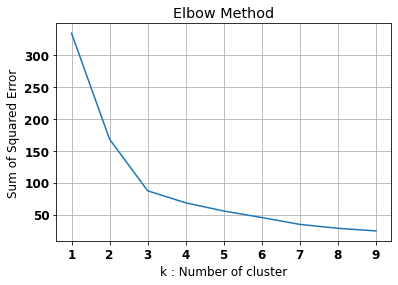

In [56]:
from sklearn.cluster import KMeans

inertia={}
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, max_iter=1000).fit(X_s_df)
    inertia[i]= kmeans.inertia_ 

sns.lineplot(x = list(inertia.keys()), y = list(inertia.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

We can clearly see that at 3 graph resembles elbow also, we can categorise the data into developing, under-developed and Developed through it.

In [62]:

model = KMeans(n_clusters = 3,max_iter = 1000)
model.fit(X_s_df)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_
df['Class'] = labels
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Class
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


Doing K-means clustering and adding the class to original dataframe.

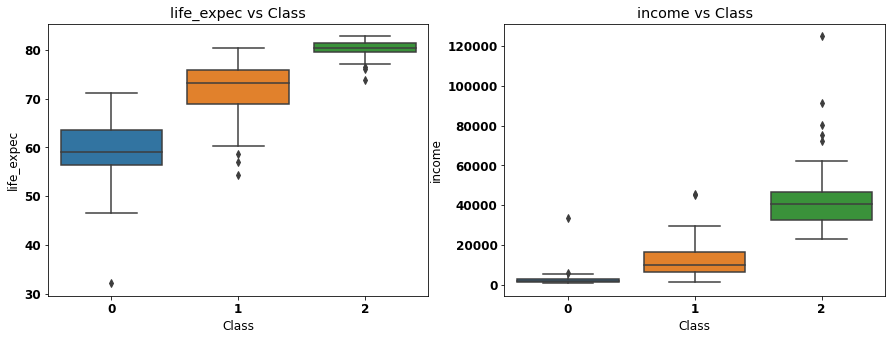

In [63]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'life_expec', data  = df)
plt.title('life_expec vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = df)
plt.title('income vs Class')

plt.show()

As both life expectancy and average income of a country increases as it gets developed, we are in a confortable position to classify 0,1,2 a under-developed, developing and developed respectively.

In [64]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Class
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [65]:
df['Class'].loc[df['Class'] == 0] = 'Under Developed'
df['Class'].loc[df['Class'] == 1] = 'Developing'
df['Class'].loc[df['Class'] == 2] = 'Developed'

df

/home/prajjwalbajpai/.conda/envs/machine_learning/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Class
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Under Developed
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Developing
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Developing
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Under Developed
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Developing
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,Developing
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,Developing
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,Developing
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,Under Developed


#### Plotting the class on actual world Map

In [67]:
import plotly.express as px

fig = px.choropleth(df[['country','Class']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Development of Countries',
                    color = df['Class'],  
                    color_discrete_map = {'Under Developed':'Red',
                                        'Developing':'Yellow',
                                        'Developed':'Green'}
                                        )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

And we can see that the map matches with the reality, with exception of some Middle eastern countries like, Iran, Iraq etc. are under-developed but the model classifies them as developing this could be due to the excessive economic activites by terrorist organisations that have affected this.